<a href="https://colab.research.google.com/github/chittoorking/GRIP_Projects/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem statement:**
For a given Iris dataset we need to predict the optimum number of clusters and represent it visually

*Importing necessary libraries to do this project*

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

**Let us load the Iris dataset to the notebook**

In [29]:
#Iris is a dataset available on datasets that we have imported from sklearn
Iris = datasets.load_iris()
#Converting Iris dataset into a pandas dataframe
Iris_df = pd.DataFrame(Iris.data,columns=Iris.feature_names)

Let us see the shape and how the dataset looks like by loading top 5 of the iris data frame


In [30]:
print(Iris_df.shape)
Iris_df.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Finding the optimum number of clusters


In [31]:
#retrieve data from a Pandas DataFrame
data = Iris_df.iloc[:,[0,1,2,3]].values
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [32]:
from sklearn.cluster import KMeans
wcss =[]
#‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
# n_init : Number of time the k-means algorithm will be run with different centroid seeds.
# The final results will be the best output of n_init consecutive runs in terms of inertia.Let us take 15 for our project.
# max_iters : Maximum number of iterations of the k-means algorithm for a single run.
# Random_state is used to set the seed for the random generator so that we can ensure that the results that we get can be reproduced
for i in range(1,11):
  kmeans = KMeans(n_clusters= i,init ='k-means++',max_iter=400,n_init=15,random_state=0)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)
#K-Means:Inertia measures how well a dataset was clustered by K-Means. 
#It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.
#A good model is one with low inertia AND a low number of clusters (K).

Plotting the results

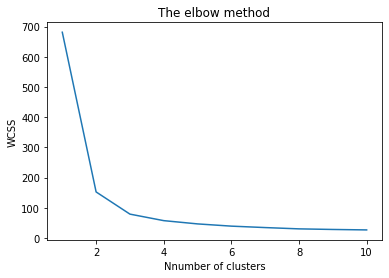

In [33]:
#To determine the optimal number of clusters, we have to select the value of k at the “elbow” 
#ie the point after which the distortion/inertia start decreasing in a linear fashion.
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Nnumber of clusters')
plt.ylabel('WCSS') #Within cluster sum of squares
plt.show()


The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

**We can see clearly the elbow occurs at 3**

In [34]:
#Building the KMeans classifier model
kmeans = KMeans(n_clusters=3,init = 'k-means++',max_iter= 400,n_init=15,random_state=0)

In [35]:
y_kmeans= kmeans.fit_predict(data)

**Visualising the clusters**

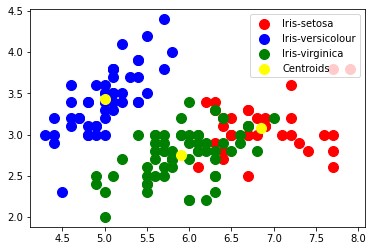

In [36]:
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s=100, c='red', label='Iris-setosa')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1],  s = 100, c = 'green', label = 'Iris-virginica')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 100,c = 'yellow',label = 'Centroids')
plt.legend(loc='upper right')
plt.show()

**-----------------This concludes our project---------------------------**